# Self-Organizing Maps

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pylab import bone, pcolor, colorbar, plot, show
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [25]:
df = pd.read_csv('./Credit_Card_Applications.csv')

In [26]:
print(f'{df.head()}')
print('\n-------------------------------------------------------------------\n')
print(f'{df.describe()}')
print('\n-------------------------------------------------------------------\n')
print(f'{df.info()}')
print('\n-------------------------------------------------------------------\n')
print(f'{df.columns}')

   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  

-------------------------------------------------------------------

         CustomerID          A1          A2          A3          A4  \
count  6.900000e+02  690.000000  690.000000  690.000000  690.000000   
mean   1.569047e+07    0.678261   31.568203    4.758725    1.766667   
std    7.150647e+04    0.467482   11.853273    4.978163    0.430063   
min    1.556571e+07    0.000000   13.750000    0.00

In [27]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Feature Scaling

In [28]:
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [108]:
sc.scale_

array([4.67143514e-01, 1.18446803e+01, 4.97455458e+00, 4.29751080e-01,
       3.68059479e+00, 1.99087184e+00, 3.34408747e+00, 4.99462008e-01,
       4.94721136e-01, 4.85941489e+00, 4.98230433e-01, 2.98596451e-01,
       1.72034475e+02, 5.20632579e+03, 4.96957769e-01])

### Training the SOM

In [45]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1, learning_rate=0.05)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)

### Visualizing the results

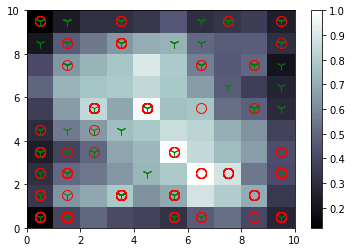

In [70]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', '1']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None', markersize=10,
         markeredgewidth=1)
show()

### Finding the frauds

In [72]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,5)], mappings[(5,3)], mappings[(6,2)]), axis=0)
frauds = sc.inverse_transform(frauds)

# Part 2: Adding ANN

In [85]:
customers = df.iloc[:, 1:].values

### Creating the dependent variable

In [86]:
is_fraud = np.zeros(len(df))
for i in range(len(df)):
    if df.iloc[i,0] in frauds:
        is_fraud[i] = 1

### Feature Scaling

In [87]:
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Initializing the ANN

In [88]:
classifier = Sequential()

### Adding the input layer and the first hidden layer

In [89]:
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

### Adding the output layer

In [90]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

### Compiling the ANN

In [91]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Fitting the ANN to the Training set

In [92]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 2s 3ms/step - loss: 0.4226 - acc: 1.0000
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.0711 - acc: 1.0000


### Predicting the probabilities of frauds

In [103]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((df.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]
y_pred = [[round(i,4) for i in num] for num in y_pred]
y_pred.reverse()

In [114]:
y_pred

[[15725776.0, 0.1949],
 [15767264.0, 0.1409],
 [15736399.0, 0.1287],
 [15664793.0, 0.118],
 [15586174.0, 0.1146],
 [15790113.0, 0.1091],
 [15744044.0, 0.1054],
 [15594133.0, 0.1046],
 [15573520.0, 0.1031],
 [15647191.0, 0.0988],
 [15772329.0, 0.0981],
 [15719940.0, 0.0882],
 [15569595.0, 0.0862],
 [15692408.0, 0.0853],
 [15705379.0, 0.0835],
 [15716347.0, 0.0823],
 [15647295.0, 0.0793],
 [15769356.0, 0.0777],
 [15692137.0, 0.0743],
 [15784526.0, 0.0735],
 [15735572.0, 0.0726],
 [15682540.0, 0.0718],
 [15686461.0, 0.071],
 [15748649.0, 0.0709],
 [15592412.0, 0.0692],
 [15761854.0, 0.0691],
 [15636626.0, 0.067],
 [15576680.0, 0.0666],
 [15667934.0, 0.0662],
 [15726167.0, 0.0662],
 [15686885.0, 0.0647],
 [15666096.0, 0.0636],
 [15770995.0, 0.0635],
 [15764922.0, 0.0629],
 [15580914.0, 0.0617],
 [15747757.0, 0.0614],
 [15670029.0, 0.0612],
 [15690372.0, 0.0612],
 [15799859.0, 0.0602],
 [15690169.0, 0.0595],
 [15765487.0, 0.058],
 [15710138.0, 0.0577],
 [15813718.0, 0.0577],
 [15815271.0, 0

In [111]:
fr_list = [[round(i,2) for i in num] for num in frauds]

In [112]:
len(fr_list)

56